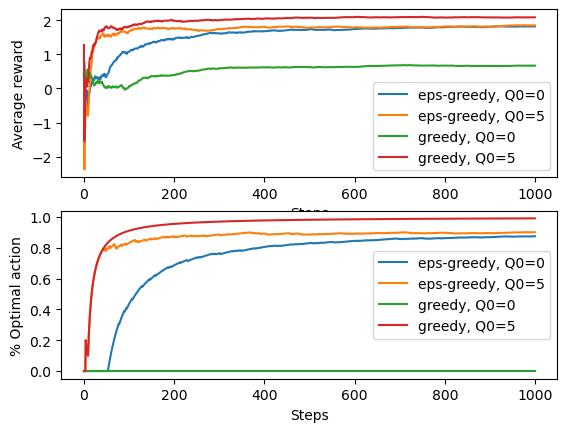

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, k, mean=0, std=1):
        self.k = k
        self.mean = mean
        self.std = std
        self.true_values = np.random.normal(self.mean, self.std, self.k)
        
    def pull_arm(self, arm):
        return np.random.normal(self.true_values[arm], 1)
        
class EpsilonGreedyAgent:
    def __init__(self, epsilon, k, initial_estimate=0):
        self.epsilon = epsilon
        self.k = k
        self.Q = np.zeros(k) + initial_estimate
        self.N = np.zeros(k)
        
    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.Q)
        
    def update_Q(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
        
def run_experiment(agent, bandit, num_steps):
    rewards = []
    optimal_actions = []
    for i in range(num_steps):
        action = agent.choose_action()
        reward = bandit.pull_arm(action)
        agent.update_Q(action, reward)
        rewards.append(reward)
        optimal_actions.append(action == np.argmax(bandit.true_values))
    return rewards, optimal_actions
    
def plot_results(rewards, optimal_actions, label):
    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / np.arange(1, len(rewards) + 1)
    optimal_action_percentages = np.cumsum(optimal_actions) / np.arange(1, len(optimal_actions) + 1)
    plt.subplot(2, 1, 1)
    plt.plot(average_rewards, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(optimal_action_percentages, label=label)
    plt.xlabel('Steps')
    plt.ylabel('% Optimal action')
    plt.legend()

# parameters from Figure 2.1
k = 10
mean = 0
std = 1
num_steps = 1000

# automatic parameter generation
# alpha = 1/N
# epsilon = 1/N
# c = 2
agent_params = [
    {'epsilon': 0.1, 'initial_estimate': 0},
    {'epsilon': 0.1, 'initial_estimate': 5},
    {'epsilon': 0, 'initial_estimate': 0},
    {'epsilon': 0, 'initial_estimate': 5},
]

bandit = MultiArmedBandit(k, mean, std)

for params in agent_params:
    agent = EpsilonGreedyAgent(params['epsilon'], k, params['initial_estimate'])
    rewards, optimal_actions = run_experiment(agent, bandit, num_steps)
    label = f"{'eps-greedy' if params['epsilon'] > 0 else 'greedy'}, Q0={params['initial_estimate']}"
    plot_results(rewards, optimal_actions, label)
    
plt.show()

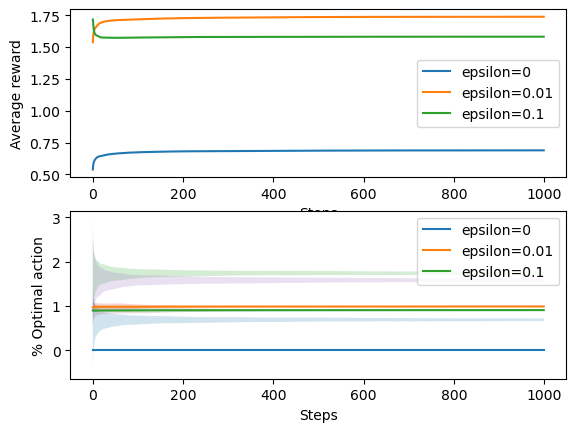

In [2]:
k = 10
mean = 0
std = 1
num_steps = 1000
num_runs = 200

bandit = MultiArmedBandit(k, mean, std)

# epsilon-greedy agents with different values of epsilon
epsilons = [0, 0.01, 0.1]
agents = [EpsilonGreedyAgent(epsilon, k) for epsilon in epsilons]

# run the experiment multiple times and compute the average results
average_rewards = np.zeros((num_runs, num_steps, len(epsilons)))
optimal_action_percentages = np.zeros((num_runs, num_steps, len(epsilons)))

for i in range(num_runs):
    for j, agent in enumerate(agents):
        rewards, optimal_actions = run_experiment(agent, bandit, num_steps)
        average_rewards[i, :, j] = np.cumsum(rewards) / np.arange(1, num_steps + 1)
        optimal_action_percentages[i, :, j] = np.cumsum(optimal_actions) / np.arange(1, num_steps + 1)

# compute the mean and standard deviation over all runs
mean_average_rewards = np.mean(average_rewards, axis=0)
stddev_average_rewards = np.std(average_rewards, axis=0)
mean_optimal_action_percentages = np.mean(optimal_action_percentages, axis=0)
stddev_optimal_action_percentages = np.std(optimal_action_percentages, axis=0)

# plot the results
for j, epsilon in enumerate(epsilons):
    label = f"epsilon={epsilon}"
    plot_results(mean_average_rewards[:, j], mean_optimal_action_percentages[:, j], label)
    plt.fill_between(np.arange(num_steps), mean_average_rewards[:, j] - stddev_average_rewards[:, j], 
                     mean_average_rewards[:, j] + stddev_average_rewards[:, j], alpha=0.2)
    plt.fill_between(np.arange(num_steps), mean_optimal_action_percentages[:, j] - stddev_optimal_action_percentages[:, j], 
                     mean_optimal_action_percentages[:, j] + stddev_optimal_action_percentages[:, j], alpha=0.2)

plt.show()

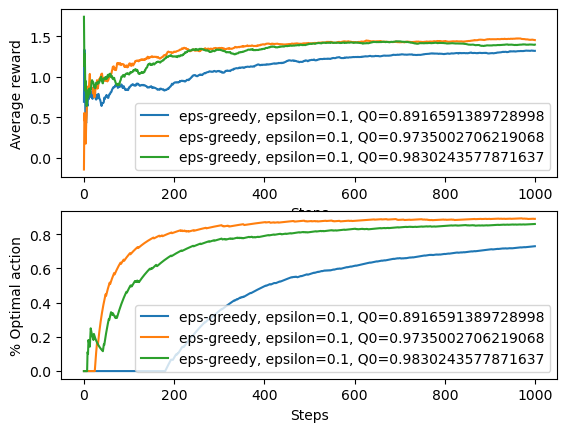

In [5]:
k = 10
mean = 0
std = 1
num_steps = 1000

bandit = MultiArmedBandit(k, mean, std)

# epsilon-greedy agents with different values of epsilon and Q0
epsilons = [0.1]
Q0_values = [0, 1, 5]
agents = [EpsilonGreedyAgent(epsilon, k, Q0) for epsilon in epsilons for Q0 in Q0_values]

# run the experiment for each Q0 value
for agent in agents:
    rewards, optimal_actions = run_experiment(agent, bandit, num_steps)
    label = f"eps-greedy, epsilon={agent.epsilon}, Q0={agent.Q[0]}"
    plot_results(rewards, optimal_actions, label)

plt.show()